Connected to .de_bank_churn_analysis (Python 3.11.7)

In [43]:
# flake8: noqa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import StandardScaler


In [4]:
# Read data from the csv file

churn_data = pd.read_csv("Customer-Churn-Records.csv")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# 1.check for missing values
churn_data.isnull().sum().sum()

0

In [6]:
# 2.check for duplicate values
churn_data.duplicated().sum()

0

In [7]:
# drop the unnecessary columns
churn_data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
# info about data types and non-null values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

C:\Users\sejal\AppData\Local\Temp\ipykernel_32504\2272440945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


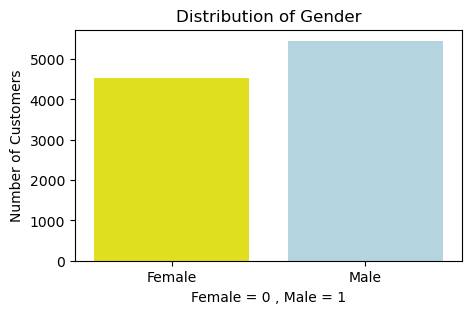

In [9]:
# Explore the distribution of gender
plt.figure(figsize=(5, 3))
sns.countplot(
    x="Gender",
    data=churn_data,
    palette={"Female": "yellow", "Male": "lightblue"},
)
plt.title("Distribution of Gender")
plt.xlabel("Female = 0 , Male = 1")
plt.ylabel("Number of Customers")
plt.show()

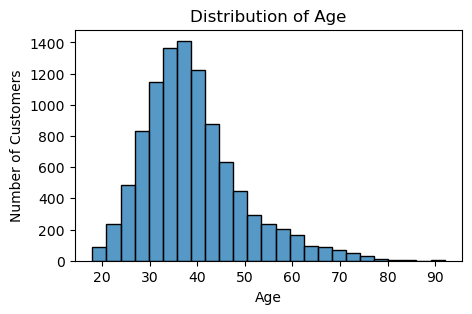

In [10]:
# Explore the distribution of age
plt.figure(figsize=(5, 3))
sns.histplot(x="Age", data=churn_data, bins=25)
plt.ylabel("Number of Customers")
plt.title("Distribution of Age")
plt.show()

C:\Users\sejal\AppData\Local\Temp\ipykernel_32504\1520859359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HasCrCard", data=churn_data, palette={"0": "red", "1": "green"})


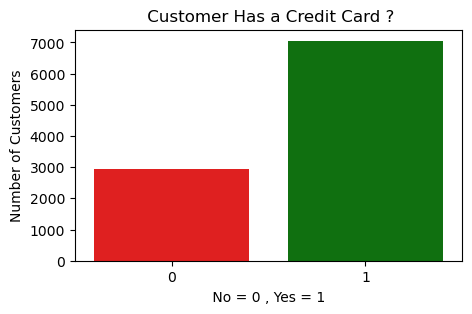

In [11]:
# Explore if the customer has credit card?
plt.figure(figsize=(5, 3))
sns.countplot(x="HasCrCard", data=churn_data, palette={"0": "red", "1": "green"})
plt.title(" Customer Has a Credit Card ?")
plt.xlabel(" No = 0 , Yes = 1 ")
plt.ylabel("Number of Customers")
plt.show()

Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


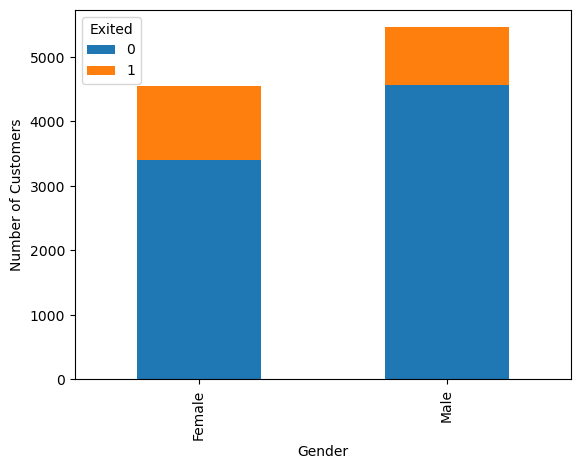

In [16]:
# Check if there's any relation between individual columns and the output.
# eg.See if gender has any effect on customer churn.
# 0: Female, 1: Male

# 1.Gender and Customer Churn Relationship
# target variable : Exited

counts = churn_data.groupby(["Gender", "Exited"]).Exited.count().unstack()
gender_exited = counts.plot(kind="bar", stacked=True)
gender_exited.set_xlabel("Gender")
gender_exited.set_ylabel("Number of Customers")
counts

In [ ]:
# From the visualization, Female customers left the bank more often compared to the Male customers.
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# 2. Geography and Customer Churn Relationship
# target variable : Exited

# Use the 'counts' DataFrame which already contains the grouped data
geo_exited = counts.plot(kind="bar", stacked=True)
geo_exited.set_xlabel("Geography")
geo_exited.set_ylabel("Number of Customers")
plt.title("Geography and Customer Churn Relationship")
plt.show()


KeyError: 'Geography'

In [ ]:
# Since Geography and Gender columns are categorical columns ,
# We convert categorical data into numerical data using one-hot encoding scheme.

# FOR regression model remove the categorical column and add one column for each of the unique values in the removed column.
# Then add 1 to the column where the actual value existed and add 0 to the rest of the columns.

# 1. Remove the Geography column

# 2. Add a column for each of three unique values- France, Germany, and Spain.

# 3. Then add 1 in the column where actually value existed.
# Logic: If the first record contained Spain in the original Geography column, we will add 1 in the Spain column
#        and zeros in the columns for France and Germany.)

# --------------------------Data Preprocessing--------------------------------------------------------------------

# 1. Drop columns "Geography" and "Gender"

In [19]:
temp = churn_data.drop(["Geography", "Gender", "Card Type"], axis=1)
temp

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [ ]:
# 2 : Create one hot coded columns for 'Geography' and 'Gender' and 'Card Type'

# get_dummies() converts categorical value into binary(0 or 1),
# iloc[:,1:] - all rows, but drops first column to avoid redundancy

In [20]:
Geography = pd.get_dummies(churn_data.Geography).iloc[:, 1:]
Gender = pd.get_dummies(churn_data.Gender).iloc[:, 1:]
CardType = pd.get_dummies(churn_data["Card Type"]).iloc[:, 1:]

In [21]:
# 3 : Concatenate our churn data set with the one hot encoded vectors

churn_data = pd.concat([temp, Geography, Gender, CardType], axis=1)
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Germany,Spain,Male,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [22]:
# Training set: To train the model (ML algorithm)
# Test Set: Model will be evaluated on test set.

# 1 : Divide the data into labels and feature set.

# feature set - all the columns except 'Exited'. Since value in the column 'Exited' is to be predicted.
# label set   - 'Exited' column

features = churn_data.drop(["Exited"], axis=1)
labels = churn_data["Exited"]

In [23]:
# Check if we still have any categorical values
features.select_dtypes(include="object").columns

Index([], dtype='object')

In [24]:
# Divide training and test

# test will consist of 20% of the total dataset.
# using train_test_split from package - sklearn.model_selection   (import statement at the beginning)
# train_test_split shuffles the data and outputs 4 arrays/dataframes
# input args - features: churn_data excluding exited, label: target column, test_size: 20% for test, 
# random_state= seed to ensure reproducibilty

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=20
)

In [25]:
# 1. Random forest
# n_estimators:Number of decision trees in the forest.
#             More trees → usually better performance but slower training
# fit() - trains the model, learns patters in training data.
# predict() - predicts labels for unseen data, returns an array 'predicted_lables' with values 0/1 for churn,
# compared to actual test labels to evaluate performance.

rfc_object = rfc(n_estimators=200, random_state=10)

rfc_object.fit(train_features, train_labels)

predicted_labels = rfc_object.predict(test_features)

In [26]:
rfc_object.fit(train_features, train_labels)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
predicted_labels = rfc_object.predict(test_features)

In [28]:
# The most commonly used metrics are precision and recall, F1 measure, accuracy and confusion matrix.
# The Scikit Learn library contains classes that can be used to calculate these metrics.

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate performance

In [29]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1623
           1       0.99      1.00      1.00       377

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [30]:
print(confusion_matrix(test_labels, predicted_labels))

[[1620    3]
 [   0  377]]


In [31]:
print(accuracy_score(test_labels, predicted_labels))

0.9985


In [32]:
# 2.Logistic regression:

# from sklearn.linear_model import LogisticRegression

In [ ]:
scalar = StandardScaler()

train_scaled = pd.DataFrame(scalar.fit_transform(train_features), columns= train_features.columns)
test_scaled = pd.DataFrame(scalar.fit_transform(test_features), columns= test_features.columns)

lr = LogisticRegression(solver='saga',max_iter=1000,random_state=20)



In [53]:

lr.fit(train_scaled, train_labels)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,20
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
predicted_labels = lr.predict(test_scaled)

In [55]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1623
           1       0.99      1.00      1.00       377

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [56]:
print(confusion_matrix(test_labels, predicted_labels))

[[1620    3]
 [   0  377]]


In [57]:
print(accuracy_score(test_labels, predicted_labels))

0.9985


In [ ]:
# Logistic Regression model accuracy: 99.8%